This notebook will be used for the Coursera Applied Data Science Capstone Project.

Importing libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [141]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


Reading in the Collisions data file

In [142]:
# !conda install -c anaconda xlrd --yes
path = 'C:\collisions.csv'
df = pd.read_csv(path)
df.head()

C:\Users\neary\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Checking the datatypes

In [143]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Assessing the correlation between numerical variables

In [144]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


Describing the numerical data

In [145]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


Describing the categorical data

In [146]:
df.describe(include=['object'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1776526,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


Checking the value counts of the SEVERITYCODE, SEVERITYDESC, WEATHER, ROADCOND and LIGHTCOND fields

In [147]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [148]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [149]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [150]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [151]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

Converting SEVERITYCODE field to datatype String

In [152]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype(str)

Printing datatypes

In [153]:
print(df.dtypes)

SEVERITYCODE       object
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Producing plot to show count of records in the dataset, categorised by Severity Code and Weather condition

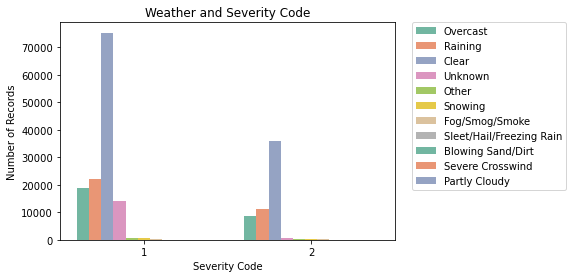

In [154]:
sns.countplot(x = 'SEVERITYCODE', hue = 'WEATHER', data=df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Weather and Severity Code')
plt.ylabel('Number of Records')
plt.xlabel('Severity Code')
plt.show()

Producing plot to show count of records in the dataset, categorised by Severity Code and Road Condition

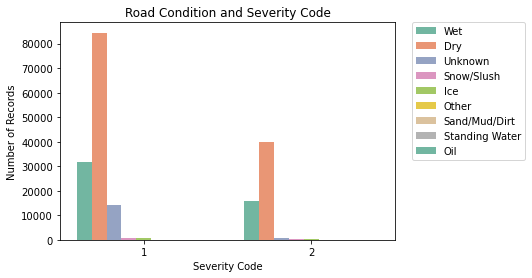

In [155]:
sns.countplot(x = 'SEVERITYCODE', hue = 'ROADCOND', data=df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Road Condition and Severity Code')
plt.ylabel('Number of Records')
plt.xlabel('Severity Code')
plt.show()

Producing plot to show count of records in the dataset, categorised by Severity Code and Light Condition

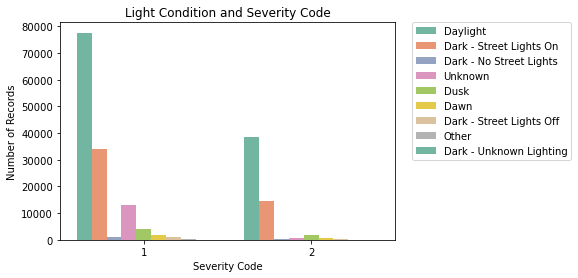

In [156]:
sns.countplot(x = 'SEVERITYCODE', hue = 'LIGHTCOND', data=df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Light Condition and Severity Code')
plt.ylabel('Number of Records')
plt.xlabel('Severity Code')
plt.show()

Producing plot to show count of records in the dataset, categorised by Severity Code and Weather condition, this time grouped by Weather condition

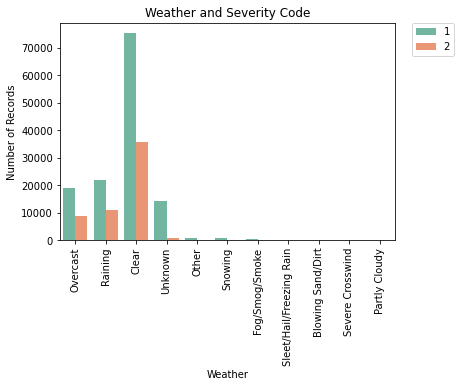

In [157]:
sns.countplot(x = 'WEATHER', hue = 'SEVERITYCODE', data=df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Weather and Severity Code')
plt.ylabel('Number of Records')
plt.xlabel('Weather')
plt.xticks(rotation=90)
plt.show()

Producing plot to show count of records in the dataset, categorised by Severity Code and Road Condition, this time grouped by Road Condition

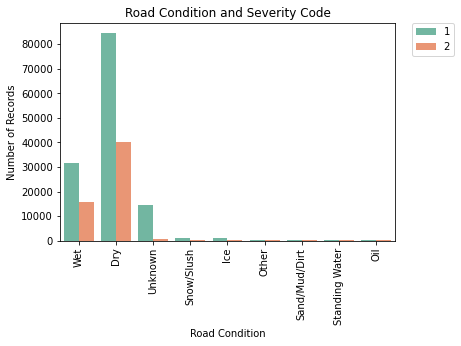

In [158]:
sns.countplot(x = 'ROADCOND', hue = 'SEVERITYCODE', data=df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Road Condition and Severity Code')
plt.ylabel('Number of Records')
plt.xlabel('Road Condition')
plt.xticks(rotation=90)
plt.show()

Producing plot to show count of records in the dataset, categorised by Severity Code and Light Condition, this time grouped by Light Condition

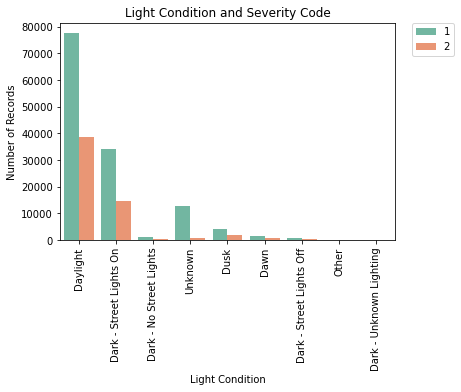

In [159]:
sns.countplot(x = 'LIGHTCOND', hue = 'SEVERITYCODE', data=df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Light Condition and Severity Code')
plt.ylabel('Number of Records')
plt.xlabel('Light Condition')
plt.xticks(rotation=90)
plt.show()

Producing a plot of dataset records to show what percentage of each Weather condition has a Severity Code of 1 or 2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

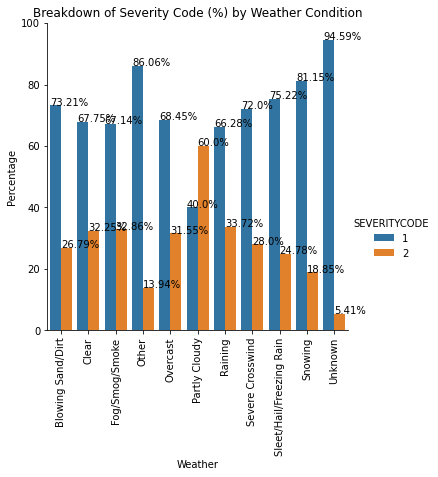

In [160]:
x1,y1 = 'WEATHER', 'SEVERITYCODE'

df1 = df.groupby(x1)[y1].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='WEATHER',y='percent',hue=y1,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Breakdown of Severity Code (%) by Weather Condition')
plt.ylabel('Percentage')
plt.xlabel('Weather')
plt.xticks(rotation=90)

Producing a plot of dataset records to show what percentage of each Road Condition has a Severity Code of 1 or 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

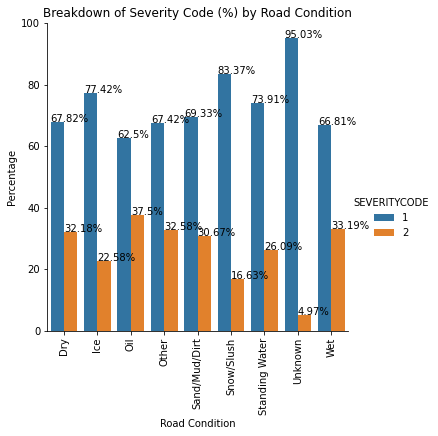

In [161]:
x2,y2 = 'ROADCOND', 'SEVERITYCODE'

df2 = df.groupby(x2)[y2].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('percent').reset_index()

g = sns.catplot(x='ROADCOND',y='percent',hue=y2,kind='bar',data=df2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.title('Breakdown of Severity Code (%) by Road Condition')
plt.ylabel('Percentage')
plt.xlabel('Road Condition')
plt.xticks(rotation=90)

Producing a plot of dataset records to show what percentage of each Light Condition has a Severity Code of 1 or 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

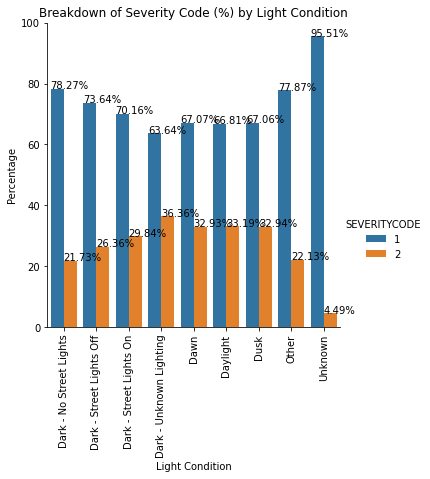

In [162]:
x3,y3 = 'LIGHTCOND', 'SEVERITYCODE'

df3 = df.groupby(x3)[y3].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('percent').reset_index()

g = sns.catplot(x='LIGHTCOND',y='percent',hue=y3,kind='bar',data=df3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.title('Breakdown of Severity Code (%) by Light Condition')
plt.ylabel('Percentage')
plt.xlabel('Light Condition')
plt.xticks(rotation=90)

Chi Square values

In [163]:
dfsub = pd.DataFrame(df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']])
dfsub.head()
dfsub.shape

# Chi square for Weather

cross1 = pd.crosstab(dfsub.SEVERITYCODE,dfsub.WEATHER)
cross1

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross1.values)
print('Chi Square value Weather', chi2, 'P Value Weather', p, 'DOF Weather', dof)

# Chi square for Road Condition

cross2 = pd.crosstab(dfsub.SEVERITYCODE,dfsub.ROADCOND)
cross2

chi2, p, dof, expected = chi2_contingency(cross2.values)
print('Chi Square value Road Condition', chi2, 'P Value Road Condition', p, 'DOF Road Condition', dof)

# Chi square for Light Condition

cross3 = pd.crosstab(dfsub.SEVERITYCODE,dfsub.LIGHTCOND)
cross3

chi2, p, dof, expected = chi2_contingency(cross3.values)
print('Chi Square value Light Condition', chi2, 'P Value Light Condition', p, 'DOF Light Condition', dof)

Chi Square value Weather 5013.393454799641 P Value Weather 0.0 DOF Weather 10
Chi Square value Road Condition 5116.816089599857 P Value Road Condition 0.0 DOF Road Condition 8
Chi Square value Light Condition 4823.546033488934 P Value Light Condition 0.0 DOF Light Condition 8


Checking unique values in Severity Code (SEVERITYCODE) field

In [164]:
dfsub['SEVERITYCODE'].unique()

array(['2', '1'], dtype=object)

Checking unique values in WEATHER (Weather) field

In [165]:
dfsub['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

Checking unique values in ROADCOND (Road Condition) field

In [166]:
dfsub['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

Checking unique values in LIGHTCOND (Light Condition) field

In [167]:
dfsub['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

Creating a subset of the dataframe (named dfsub2 for Dataframe Subset 2) and dropping the nans in Dataframe Subset 2

In [168]:
dfsub2 = dfsub.dropna()
dfsub2

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


Checking the datatypes of Dataframe Subset 2

In [169]:
print(dfsub2.dtypes)

SEVERITYCODE    object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object


Ensuring all datatypes in Dataframe Subset 2 are of type String

In [170]:
dfsub2.astype(str)
print(dfsub2.dtypes)

SEVERITYCODE    object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object


Isolating independent variables (Weather, Road Condition and Light Condition) under value 'A'

In [171]:
A = dfsub2.iloc[:,1:4]
A

,WEATHER,ROADCOND,LIGHTCOND
0,Overcast,Wet,Daylight
1,Raining,Wet,Dark - Street Lights On
2,Overcast,Dry,Daylight
3,Clear,Dry,Daylight
4,Raining,Wet,Daylight
...,...,...,...
194668,Clear,Dry,Daylight
194669,Raining,Wet,Daylight
194670,Clear,Dry,Daylight
194671,Clear,Dry,Dusk


Isolating the dependent variable, SEVERITYCODE under value 'b'

In [172]:
b = dfsub2.iloc[:,0:1]
b

,SEVERITYCODE
0,2
1,1
2,1
3,1
4,2
...,...
194668,2
194669,1
194670,2
194671,2


Performing One Hot Encoding on the A2 subset of data (Weather, Road Condition and Light Condition)

In [173]:
A2 = pd.get_dummies(A, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
A2

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
194669,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
194670,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
194671,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Performing One Hot Encoding on the b2 subset of data (Severity Code)

In [174]:
b2 = pd.get_dummies(b, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
b2

,SEVERITYCODE_1,SEVERITYCODE_2
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
194668,0,1
194669,1,0
194670,0,1
194671,0,1


Selecting just the Severity Code 1 column of the one hot encoded SEVERITYCODE data subset

In [175]:
b3 = b2.iloc[:,0:1]
b3

,SEVERITYCODE_1
0,0
1,1
2,1
3,1
4,0
...,...
194668,0
194669,1
194670,0
194671,0


Performing Logistic Regression 

In [176]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
A2, b3 = load_iris(return_X_y=True)
clf = LogisticRegression(penalty='l2', random_state=0, max_iter=1000).fit(A2, b3)

In [177]:
clf.predict(A2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [178]:
clf.predict_proba(A2)

array([[9.81588489e-01, 1.84114969e-02, 1.45146963e-08],
       [9.71361183e-01, 2.86387869e-02, 3.02111899e-08],
       [9.85292111e-01, 1.47078770e-02, 1.23436807e-08],
       [9.76094720e-01, 2.39052403e-02, 3.97167353e-08],
       [9.85239864e-01, 1.47601243e-02, 1.20161513e-08],
       [9.70210748e-01, 2.97891777e-02, 7.40982851e-08],
       [9.86790522e-01, 1.32094584e-02, 1.99884090e-08],
       [9.76158639e-01, 2.38413329e-02, 2.77589836e-08],
       [9.79663204e-01, 2.03367655e-02, 3.06038432e-08],
       [9.68785928e-01, 3.12140399e-02, 3.17554465e-08],
       [9.76222389e-01, 2.37775920e-02, 1.94014193e-08],
       [9.75228285e-01, 2.47716708e-02, 4.39884870e-08],
       [9.74253764e-01, 2.57462142e-02, 2.15314198e-08],
       [9.91888701e-01, 8.11129496e-03, 3.89002706e-09],
       [9.88002543e-01, 1.19974544e-02, 2.84873891e-09],
       [9.86638090e-01, 1.33618970e-02, 1.29604687e-08],
       [9.87964301e-01, 1.20356893e-02, 9.27458215e-09],
       [9.81342650e-01, 1.86573

In [179]:
clf.score(A2, b3)

0.9733333333333334

Categorising Weather as 'Clear' and 'Not Clear'

In [126]:
dfweather = pd.DataFrame(dfsub2[['SEVERITYCODE', 'WEATHER']])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Raining', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Overcast', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Unknown', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Snowing', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Other', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Fog/Smog/Smoke', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Sleet/Hail/Freezing Rain', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Blowing Sand/Dirt', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Severe Crosswind', 'Not Clear', dfweather['WEATHER'])
dfweather['WEATHER']=np.where(dfweather['WEATHER'] =='Partly Cloudy', 'Not Clear', dfweather['WEATHER'])

Checking categorisation of Weather

In [182]:
dfweather['WEATHER'].value_counts()

Clear        111008
Not Clear     78329
Name: WEATHER, dtype: int64

Look at top 5 rows of dfweather dataframe

In [183]:
dfweather.head()

,SEVERITYCODE,WEATHER
0,2,Not Clear
1,1,Not Clear
2,1,Not Clear
3,1,Clear
4,2,Not Clear


One Hot Encoding the 'dfweather' dataframe

In [184]:
weatherd = pd.get_dummies(dfweather, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
weatherd

,SEVERITYCODE_1,SEVERITYCODE_2,WEATHER_Clear,WEATHER_Not Clear
0,0,1,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,1,0
4,0,1,0,1
...,...,...,...,...
194668,0,1,1,0
194669,1,0,0,1
194670,0,1,1,0
194671,0,1,1,0


Creating 'W', a subset of the 'weatherd' dataframe containing only Weather Clear/Not Clear data

In [185]:
W = weatherd.iloc[:,2:4]
W = pd.DataFrame(W)
W.reset_index(drop=True, inplace=True)
W

,WEATHER_Clear,WEATHER_Not Clear
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
189332,1,0
189333,0,1
189334,1,0
189335,1,0


Creating 's', a subset of the 'weatherd' dataframe containing only Severity Code 1 data

In [186]:
s = weatherd.iloc[:,0:1]
s

,SEVERITYCODE_1
0,0
1,1
2,1
3,1
4,0
...,...
194668,0
194669,1
194670,0
194671,0


Performing Logistic Regression on Weather data (Clear/ Not Clear)

In [187]:
W, s = load_iris(return_X_y=True)
clfw = LogisticRegression(penalty='l2', random_state=0, max_iter=1000).fit(W, s)
clfw.predict(W)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [188]:
clfw.predict_proba(W)

array([[9.81588489e-01, 1.84114969e-02, 1.45146963e-08],
       [9.71361183e-01, 2.86387869e-02, 3.02111899e-08],
       [9.85292111e-01, 1.47078770e-02, 1.23436807e-08],
       [9.76094720e-01, 2.39052403e-02, 3.97167353e-08],
       [9.85239864e-01, 1.47601243e-02, 1.20161513e-08],
       [9.70210748e-01, 2.97891777e-02, 7.40982851e-08],
       [9.86790522e-01, 1.32094584e-02, 1.99884090e-08],
       [9.76158639e-01, 2.38413329e-02, 2.77589836e-08],
       [9.79663204e-01, 2.03367655e-02, 3.06038432e-08],
       [9.68785928e-01, 3.12140399e-02, 3.17554465e-08],
       [9.76222389e-01, 2.37775920e-02, 1.94014193e-08],
       [9.75228285e-01, 2.47716708e-02, 4.39884870e-08],
       [9.74253764e-01, 2.57462142e-02, 2.15314198e-08],
       [9.91888701e-01, 8.11129496e-03, 3.89002706e-09],
       [9.88002543e-01, 1.19974544e-02, 2.84873891e-09],
       [9.86638090e-01, 1.33618970e-02, 1.29604687e-08],
       [9.87964301e-01, 1.20356893e-02, 9.27458215e-09],
       [9.81342650e-01, 1.86573

In [189]:
clfw.score(W, s)

0.9733333333333334

Producing plot to show Severity Code (1 and 2) and Weather (Clear and Not Clear)

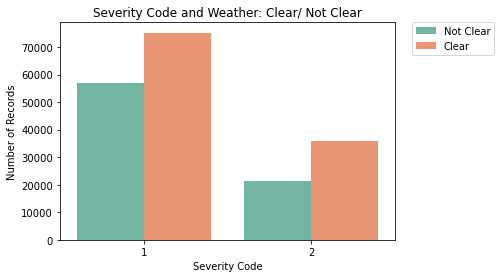

In [190]:
sns.countplot(x = 'SEVERITYCODE', hue = 'WEATHER', data=dfweather, palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Severity Code and Weather: Clear/ Not Clear')
plt.ylabel('Number of Records')
plt.xlabel('Severity Code')
plt.show()

Decision Tree for Weather - Clear/ Not Clear

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(W, s, test_size=0.3, random_state = 42)

In [192]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

In [193]:
from sklearn import metrics
y_pred = clf_dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [194]:
XN = pd.DataFrame(X_train)
XN

,0,1,2,3
0,5.5,2.4,3.7,1.0
1,6.3,2.8,5.1,1.5
2,6.4,3.1,5.5,1.8
3,6.6,3.0,4.4,1.4
4,7.2,3.6,6.1,2.5
...,...,...,...,...
100,6.1,2.8,4.0,1.3
101,4.9,2.5,4.5,1.7
102,5.8,4.0,1.2,0.2
103,5.8,2.6,4.0,1.2


[Text(257.53846153846155, 378.5785714285714, '2 <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = y[1]'),
 Text(193.15384615384616, 320.3357142857143, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = y[0]'),
 Text(321.9230769230769, 320.3357142857143, '2 <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = y[1]'),
 Text(128.76923076923077, 262.09285714285716, '3 <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = y[1]'),
 Text(64.38461538461539, 203.85, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = y[1]'),
 Text(193.15384615384616, 203.85, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = y[2]'),
 Text(515.0769230769231, 262.09285714285716, '3 <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = y[2]'),
 Text(321.9230769230769, 203.85, '2 <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = y[1]'),
 Text(257.53846153846155, 145.60714285714283, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = y[1]'),
 Tex

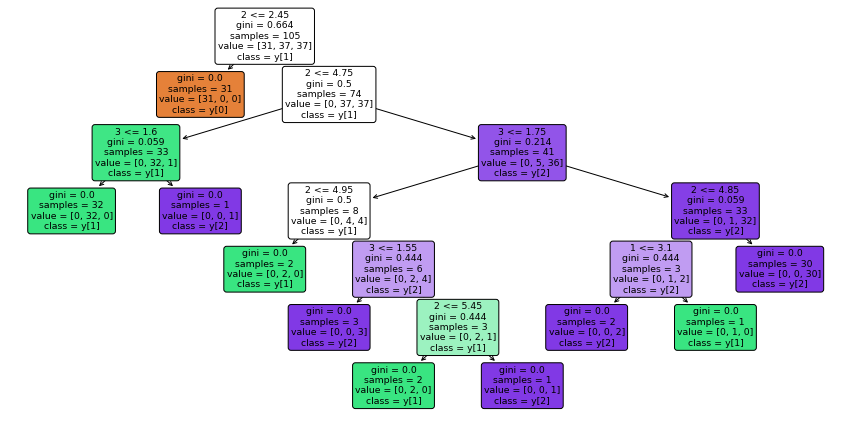

In [198]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=True,
         feature_names=XN.columns)

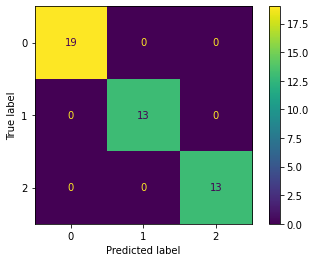

In [196]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dt, X_test, y_test)